<a href="https://www.kaggle.com/code/yussufkadir/spaceship-titanic-contest?scriptVersionId=207968017" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## Lets start with reading datas into pandas dataframes and see the structure of the data

## Part 1 data exploration and data cleaning.

In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
print("\nUnique vals of the cryosleep feature")
print(train['CryoSleep'].unique())

print("\nUnique vals of the Cabin feature")
print(train['Cabin'].unique())

print("\nUnique vals of the Destination feature")
print(train['Destination'].unique())

print("\nUnique vals of the VIP feature")
print(train['VIP'].unique())


Unique vals of the cryosleep feature
[False True nan]

Unique vals of the Cabin feature
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

Unique vals of the Destination feature
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

Unique vals of the VIP feature
[False True nan]


In [6]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### since there are many variations in cabins it is better to drop all the missing values in it. Moreover missing data accounts for less than 5% so it seems fine to drop that col.

In [7]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train.drop('Name', axis=1, inplace=True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
train.drop('PassengerId', axis=1, inplace=True)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [10]:
train['HomePlanet'] = train['HomePlanet'].fillna('Mars')
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [11]:
train['CryoSleep'] = train['CryoSleep'].replace('nan', None)
train['CryoSleep'] = train['CryoSleep'].fillna(True)
train['CryoSleep'].value_counts()

/tmp/ipykernel_17/2816709482.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['CryoSleep'] = train['CryoSleep'].fillna(True)


CryoSleep
False    5439
True     3254
Name: count, dtype: int64

In [12]:
train['Destination'].value_counts()
train['Destination'] = train['Destination'].fillna('PSO J318.5-22')
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     978
Name: count, dtype: int64

In [13]:
# I think dropping VIP would be better since it has big imbalance between true and false vals
train.drop('VIP', axis=1, inplace=True)

In [14]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True


In [15]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa'] = train['Spa'].fillna(train['Spa'].mean())
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].mean())

In [16]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [17]:
train = pd.get_dummies(train, columns=['HomePlanet','Destination'])

In [18]:
train.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,True
1,False,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,False,False,False,True
2,False,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,False,False,True
3,False,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,False,False,True
4,False,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,False,False,False,True


In [19]:
test.head()
test.drop(['PassengerId', 'Cabin', 'VIP', 'Name'], axis=1, inplace=True)

In [20]:
test.head()
test['HomePlanet'].unique()
test['HomePlanet'].value_counts()
test['HomePlanet'] = test['HomePlanet'].fillna('Mars')

In [21]:
test['CryoSleep'].unique()
test['CryoSleep'].value_counts()
test['CryoSleep'] = test['CryoSleep'].fillna(True)

/tmp/ipykernel_17/713226667.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['CryoSleep'] = test['CryoSleep'].fillna(True)


In [22]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0


In [23]:
test['Destination'].value_counts()
test['Destination'] = test['Destination'].fillna('PSO J318.5-22')
test['Destination'].value_counts()

Destination
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     480
Name: count, dtype: int64

In [24]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa'] = test['Spa'].fillna(test['Spa'].mean())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mean())

In [25]:
test = pd.get_dummies(test, columns=['HomePlanet','Destination'])

In [26]:
test.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,True,27.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,True
1,False,19.0,0.0,9.0,0.0,2823.0,0.0,True,False,False,False,False,True
2,True,31.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True,False,False
3,False,38.0,0.0,6652.0,0.0,181.0,585.0,False,True,False,False,False,True
4,False,20.0,10.0,0.0,635.0,0.0,0.0,True,False,False,False,False,True


## With the last one we have concluded the data preperation part.

In [27]:
submission_sample = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submission_sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


## This is the part where we create, train and test the model.

## Since this is a classification problem I think scaling can be used here to get more efficient classification

In [28]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [29]:
features = train.drop('Transported', axis=1).values
target = train['Transported'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=1)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/60


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7418 - loss: 0.5057 - val_accuracy: 0.7781 - val_loss: 0.4394
Epoch 2/60
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7929 - loss: 0.4397 - val_accuracy: 0.7794 - val_loss: 0.4407
Epoch 3/60
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7906 - loss: 0.4413 - val_accuracy: 0.7828 - val_loss: 0.4637
Epoch 4/60
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7980 - loss: 0.4341 - val_accuracy: 0.7794 - val_loss: 0.4369
Epoch 5/60
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7919 - loss: 0.4391 - val_accuracy: 0.7855 - val_loss: 0.4387
Epoch 6/60
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8053 - loss: 0.4179 - val_accuracy: 0.7774 - val_loss: 0.4368
Epoch 7/60
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7979 - loss: 0.4289 - val_accuracy: 0.7808 - val_loss: 0.4359
Epoch 8/60
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7880 - loss: 0.4372 - val_accuracy: 0.7862 - val_

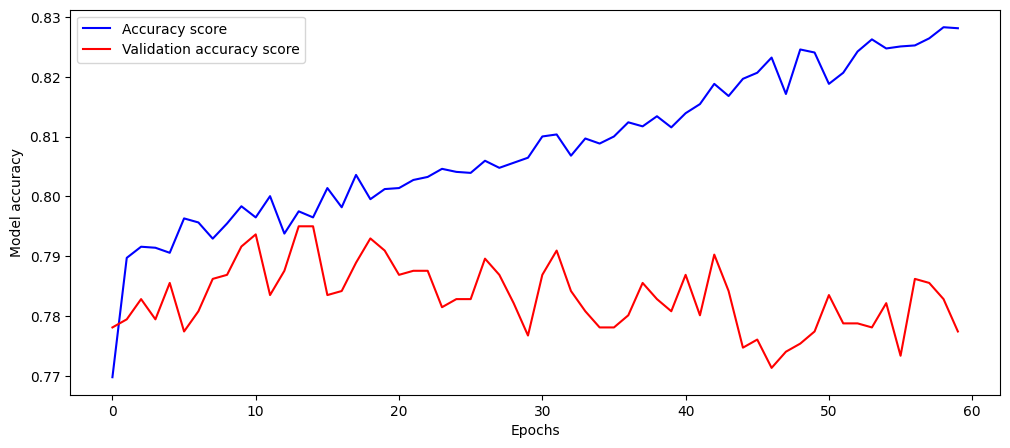

In [31]:
model = Sequential()
model.add(Dense(800, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(200, activation='relu')),
model.add(Dense(100, activation='relu')),
model.add(Dense(50, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=60, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"the loss of the model is: {test_loss}")
print(f"the accuracy of the model is: {test_accuracy}")

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Accuracy score', color='b')
plt.plot(history.history['val_accuracy'], label='Validation accuracy score', color='r')
plt.ylabel('Model accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()